In [1]:
import sys
import numpy as np
import matplotlib
#matplotlib.use("TkAgg")
import matplotlib.pyplot as plt
import time

sys.path.append('..')
from Simulation import Ornstein_Uhlenbeck
from Simulation import Random_mixture_process
from Simulation import Generic_functions
from Data import Trade_book
from Data import Player
from Model import Strategy
from Model import SLA
from Model import RWM
from BackTester import BackTester

In [2]:
ou = Random_mixture_process()
trade_cost = lambda x: Generic_functions.trading_cost(x, 10, 0.1)
utility_func = lambda x: Generic_functions.utility_function(x, 0.0001)

sla = SLA()
rwm = RWM()
strat = Strategy(rwm)

p1 = Player(price_process=ou, utility_function=utility_func, trading_cost=trade_cost, strategy=strat, model='rwm')

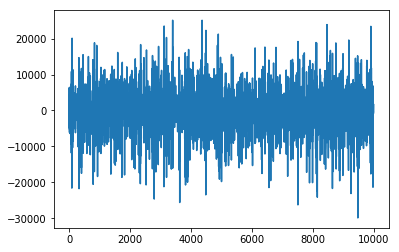

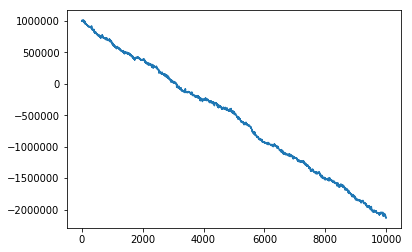

sharpe ratio is: 0.10413758721392048
10001
accuracy is :  0.3110777129289225
iteration: 1 time used is 4.034112930297852


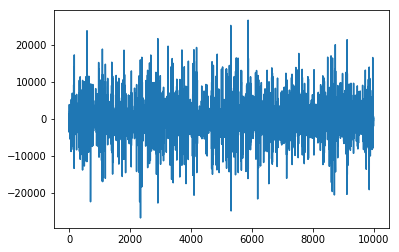

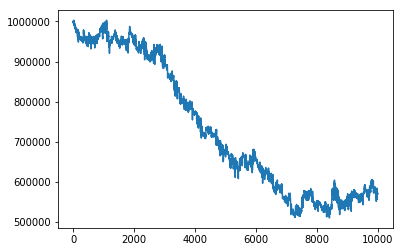

sharpe ratio is: -0.12290290317359943
10001
accuracy is :  0.39732196216822846
iteration: 2 time used is 15.100279092788696


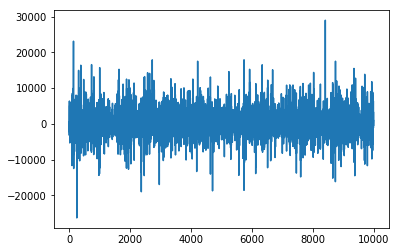

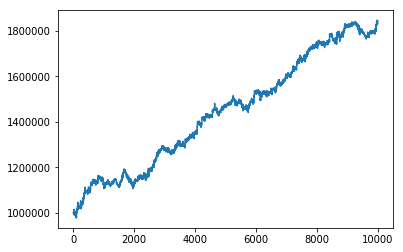

sharpe ratio is: 0.4738900832725117
10001
accuracy is :  0.49648858294123815
iteration: 3 time used is 24.712503671646118


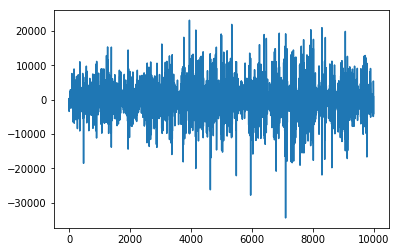

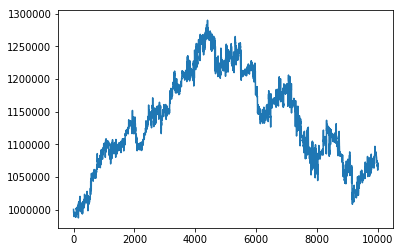

sharpe ratio is: 0.058173763574166856
10001
accuracy is :  0.45550380345678704
iteration: 4 time used is 30.384294986724854


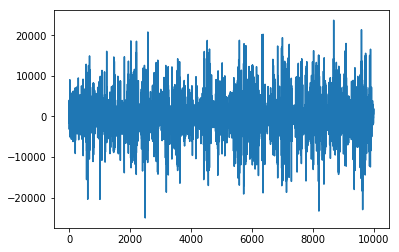

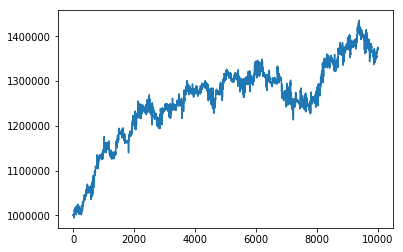

sharpe ratio is: 0.18812979676081915
10001
accuracy is :  0.3711111892703072
iteration: 5 time used is 64.81723594665527


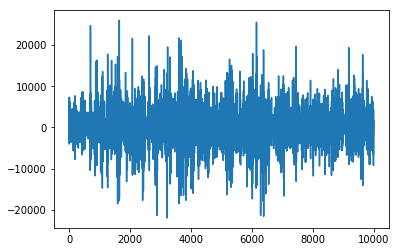

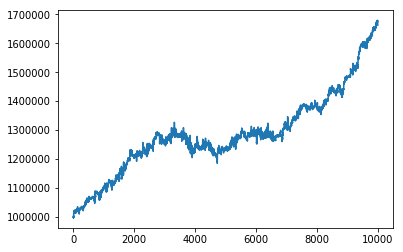

sharpe ratio is: 0.31416477021506317
10001
accuracy is :  0.5535860365892951
iteration: 6 time used is 109.31120491027832


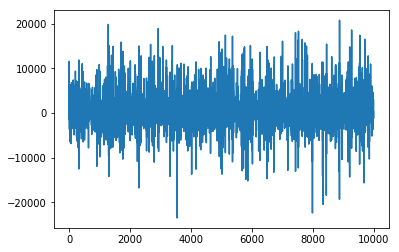

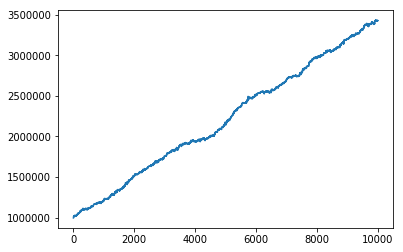

sharpe ratio is: 1.3043824154129526
10001
accuracy is :  0.53552687993821
iteration: 7 time used is 141.70304417610168


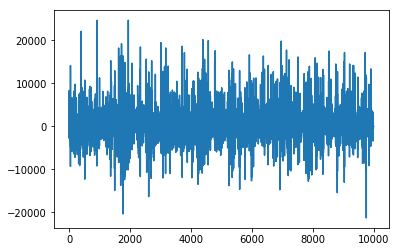

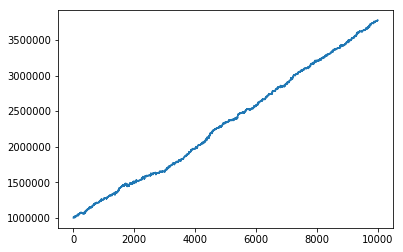

sharpe ratio is: 1.3239798208765625
10001
accuracy is :  0.52622874118651
iteration: 8 time used is 168.0939428806305


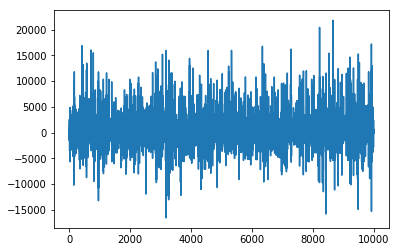

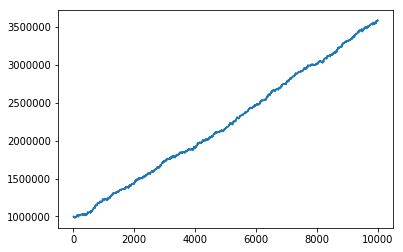

sharpe ratio is: 1.4861834722645253
10001
accuracy is :  0.48745992796408555
iteration: 9 time used is 156.09940910339355


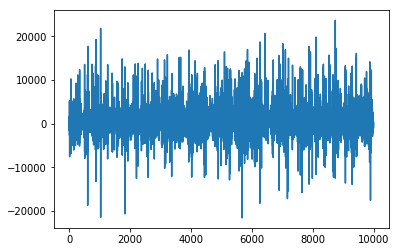

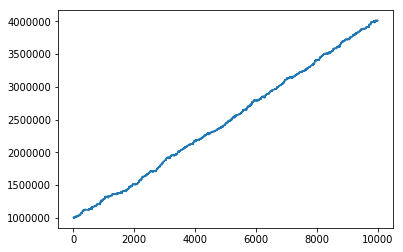

sharpe ratio is: 1.5655285784402615
10001
accuracy is :  0.5460113324523079
iteration: 10 time used is 203.51188111305237


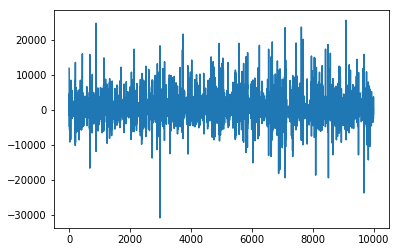

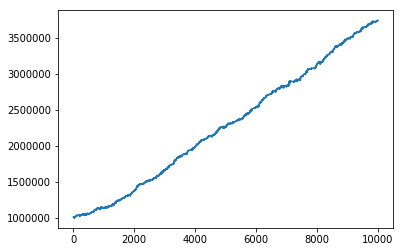

sharpe ratio is: 1.455186110836754
10001
accuracy is :  0.5097767202143513
iteration: 11 time used is 292.0715959072113


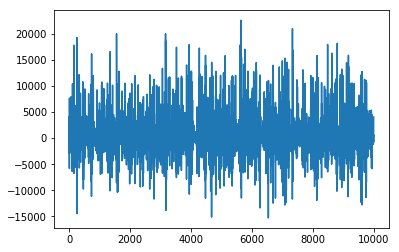

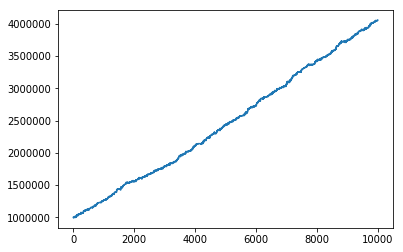

sharpe ratio is: 1.6130696318706812
10001
accuracy is :  0.4942409270039678
iteration: 12 time used is 324.4286460876465


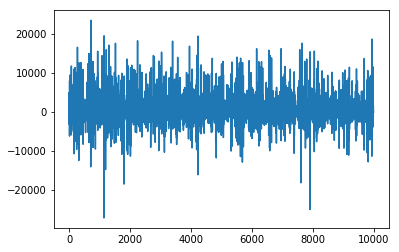

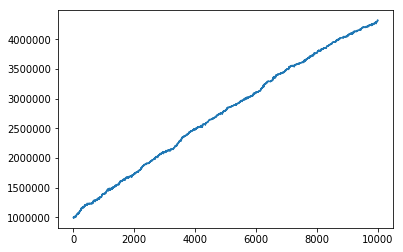

sharpe ratio is: 1.6899307488258473
10001
accuracy is :  0.4946557274894936
iteration: 13 time used is 345.28233194351196


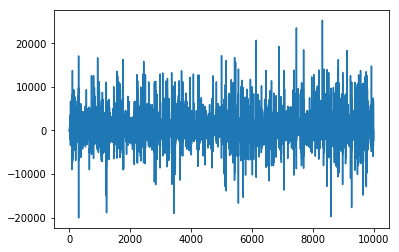

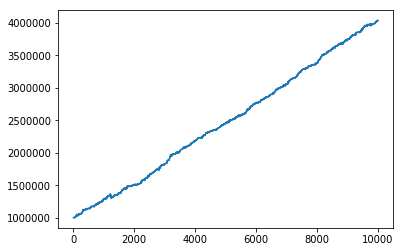

sharpe ratio is: 1.661598906029834
10001
accuracy is :  0.5519818952396535
iteration: 14 time used is 377.63110399246216


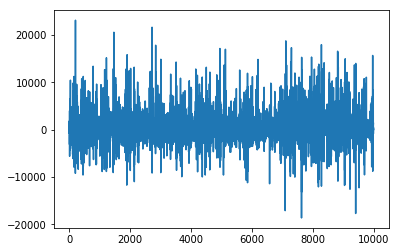

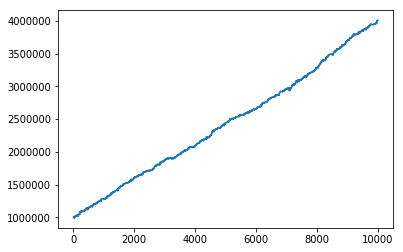

sharpe ratio is: 1.6458899685753874
10001
accuracy is :  0.46331570981294984
iteration: 15 time used is 399.78890776634216


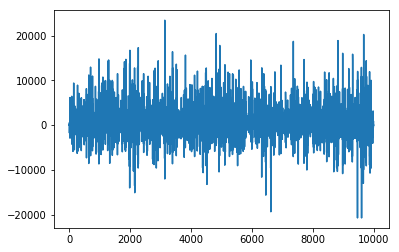

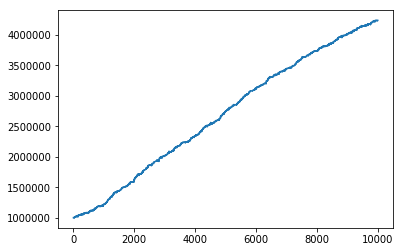

sharpe ratio is: 1.8401912877404343
10001
accuracy is :  0.4649491605547499
iteration: 16 time used is 254.7744960784912


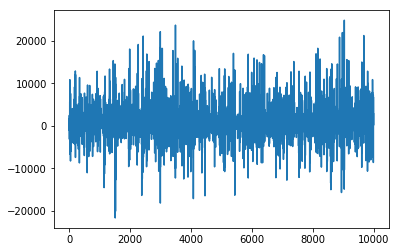

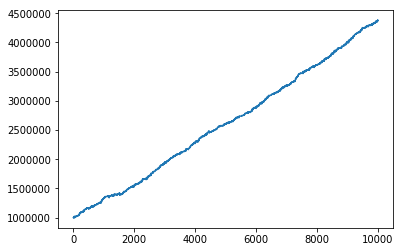

sharpe ratio is: 1.7473703131365659
10001
accuracy is :  0.4783640559088447
iteration: 17 time used is 206.4766879081726


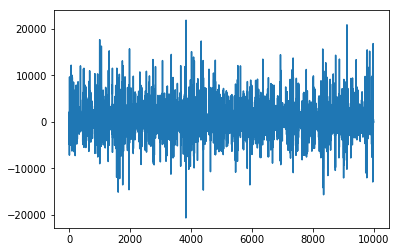

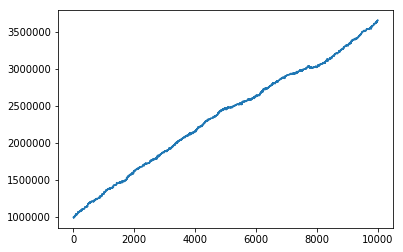

sharpe ratio is: 1.5825372873427066
10001
accuracy is :  0.49852888651259053
iteration: 18 time used is 215.3639612197876


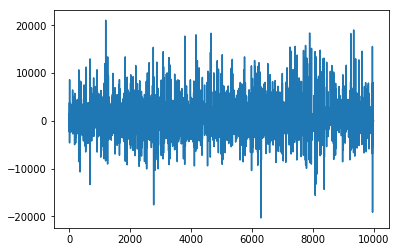

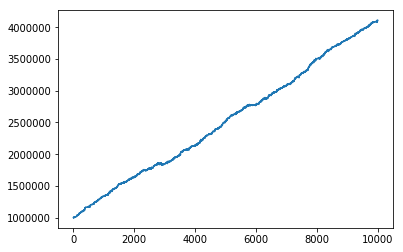

sharpe ratio is: 1.8187209012902446
10001
accuracy is :  0.46567111191021116
iteration: 19 time used is 232.51382303237915


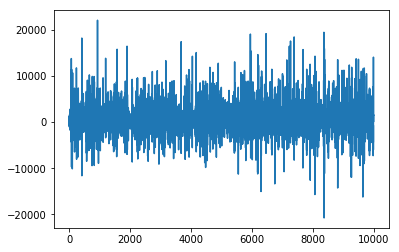

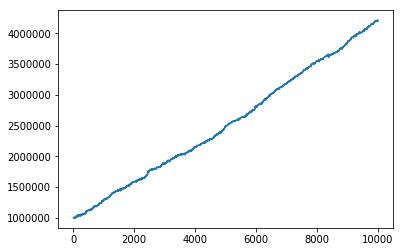

sharpe ratio is: 1.7945696138889224
10001
accuracy is :  0.46600620717899904
iteration: 20 time used is 242.2622549533844


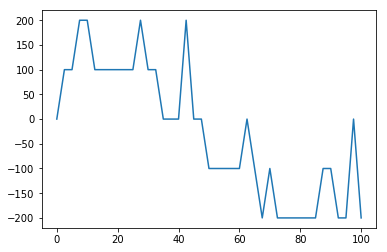

In [3]:
size = 10000
for j in range(20):
    start = time.time()
    for i in range(size):
        p1.trade_greedy_one_step(.5 * 0.9 ** j)

    dates = list(p1.trade_book.book)[:-1]
    value_list = []
    for date in dates:
        value_list.append(p1.trade_book.book[date]['value'])
    value_array = np.array(value_list)
    plt.plot(value_array)
    plt.show()
    initial_value = 1000000
    values = np.cumsum(value_array) + initial_value
    plt.plot(values)
    plt.show()
    returns = np.diff(values) / values[:-1]
    #print(returns)
    sharpe = np.mean(returns)/np.std(returns) * np.sqrt(252)
    print('sharpe ratio is:', sharpe)

    p1.update_strategy(size, 1)
    end = time.time()
    print('iteration:',j+1,'time used is', end - start)


a = np.linspace(start=0, stop=100, num=41)
b = []
for i in a:
    b.append(p1.strategy.learner.predict((i, 500), [200, 100, 0, -100, -200]))

plt.figure()
plt.plot(a,b)
plt.show()

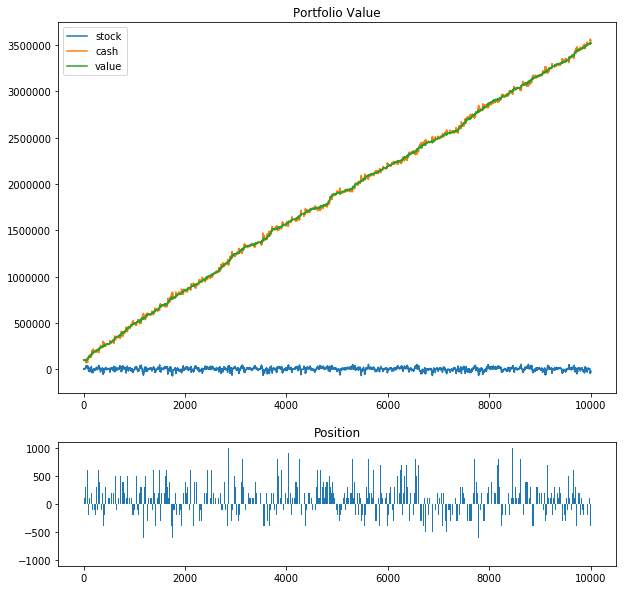

In [4]:
test_process = Random_mixture_process()
bt = BackTester(price_process=test_process, player=p1)
bt.backtest(total_time=10000, initial_value=1e5,threshold=None, action=None )
bt.plot( figsize=(10,10))

In [5]:
bt.print()

,annualized return,annualized vol,sharp ratio,hit rate,turnover,annualized cost rate,max drawdown
Player,0.0911585,0.065695,1.3876,0.184788,197400,0.0240173,0.105036
